In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def add_sand(X):
    N = len(X)
    i,j = np.random.choice((N,N),2)
    X[i,j] += 1
    return X
    
def check_equlibrium(X):
    while any(X>=4):
        I,J = np.where(X>=4)
        X[I,J] = 0
        X[I+1,J] += 1
        X[I-1,J] += 1
        X[I,J+1] += 1
        X[I,J-1] += 1
    

22235


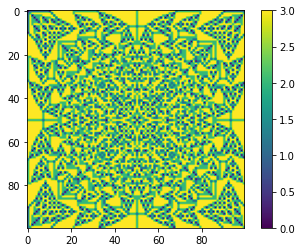

In [5]:
## pbc, deterministic model

N = 100 # system size
X = np.zeros((N,N))
T = np.arange(25000) # number of grains
for t in T:
    i,j = int(N/2), int(N/2)
    X[i,j] += 1
    q= 0
    
    while np.any(X>=4):
        I,J = np.where(X>=4)
        X[I,J] -= 4
        X[(I+1)%N,J] += 1
        X[(I-1)%N,J] += 1
        X[I,(J+1)%(N)] += 1
        X[I,(J-1)%(N)] += 1

        
    if X[0,1] > 0:
        print(t)
        break



    
plt.imshow(X)
plt.colorbar()
plt.show()
        

22235


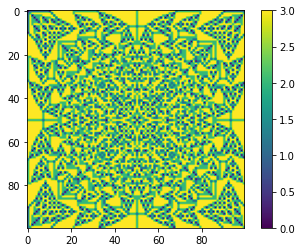

In [61]:
## 특정한 boundary 로 문양 만들기 ## 

N = 100 # system size
X = np.zeros((N,N))
T = np.arange(25000) # number of grains
for t in T:
    i,j = int(N/2), int(N/2)
    X[i,j] += 1
    q= 0
    
    
    while np.any(X>=4):
        I,J = np.where(X>=4)
        X[I,J] -= 4
        X[(I+1)%N,J] += 1
        X[(I-1)%N,J] += 1
        X[I,(J+1)%(N)] += 1
        X[I,(J-1)%(N)] += 1

        
    if X[0,1] > 0:
        print(t)
        break



    
plt.imshow(X)
plt.colorbar()
plt.show()
        

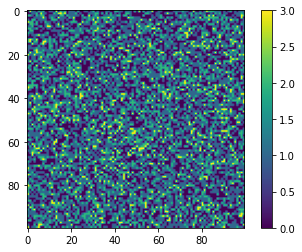

In [16]:
#pbc, Stochastic process

N = 100 # system size
X = np.zeros((N,N))
T = np.arange(10000) # number of grains

for t in T:
    i,j = 50,50
    i,j = np.random.choice(N,size = 2,replace = False)
    X[i,j] += 1
    z= 0
    while np.any(X>=4):
        I,J = np.where(X>=4)
        
        for q,p in zip(I,J):
            X[q,p] -= 4
            if q<N-1:
                X[(q+1),p] += 1
            if q>0:
                X[(q-1),p] += 1
            if p<N-1:
                X[q,(p+1)] += 1
            if p>0:
                X[q,(p-1)] += 1
        z+=1
        

plt.imshow(X)
plt.colorbar()
plt.savefig('save/sandpile%d.svg'%t)
plt.show()

In [37]:
## b.c 낭떨어지 버전 +  랜덤 grain

N = 50
X = np.random.choice((0,1,2,3),size = (N+2,N+2))
T = np.arange(500000)
avalanches_array = []
for t in T:
    i,j = np.random.choice(N,size = 2,replace = False)
    X[i,j] += 1
    X[:,-1] , X[:,0], X[0,:], X[-1,:] = 0,0,0,0
    
    avalanche = 0.
    while np.any(X[1:N+1,1:N+1]>=4):
        avalanche += 1
        I,J = np.where(X[1:N+1,1:N+1]>=4)
        X[I+1,J+1] = 0
        X[(I+2)%N,J] += 1
        X[(I)%N,J] += 1
        X[I,(J+2)%N] += 1
        X[I,(J)%N] += 1
        
        avalanches_array.append(avalanche)

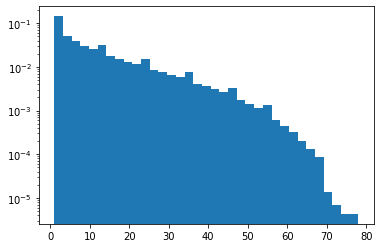

In [44]:
plt.hist(avalanches_array,bins = 35,density = True)
plt.yscale('log')
#plt.xscale('log')
plt.show()